# Lewis Hamilton

<img src="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/image.img.1920.medium.jpg/1641811370907.jpg" width="300">

### Team: Mercedes

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/helmet.img.png/1646824671908.png" width="200">

In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

ham_laps <- lap_data %>%
            filter(driverId == 1)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5683359,94.72265,1.578711


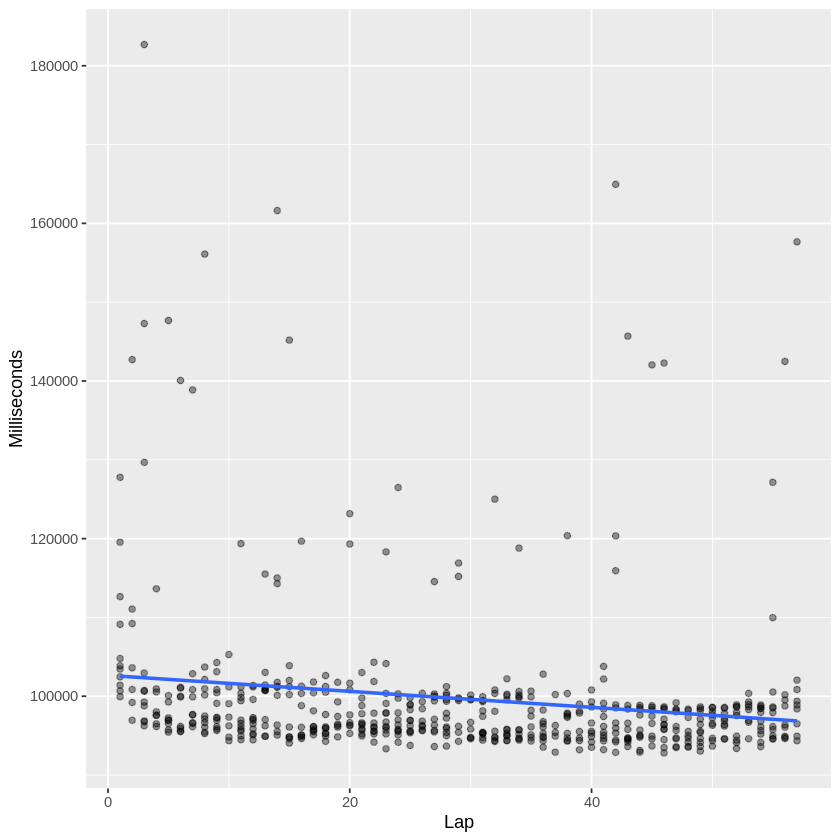

In [4]:
#1.  Bahrain 

lh_bahrain <- ham_laps %>%
                filter(raceId %in% bahrain_race_ID) 

lh_bahrain_clean <- lh_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 49)

lh_bahrain_clean_ID <- lh_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_bahrain_races <- ham_laps %>%
                    filter(raceId %in% lh_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5538090,92.3015,1.538358


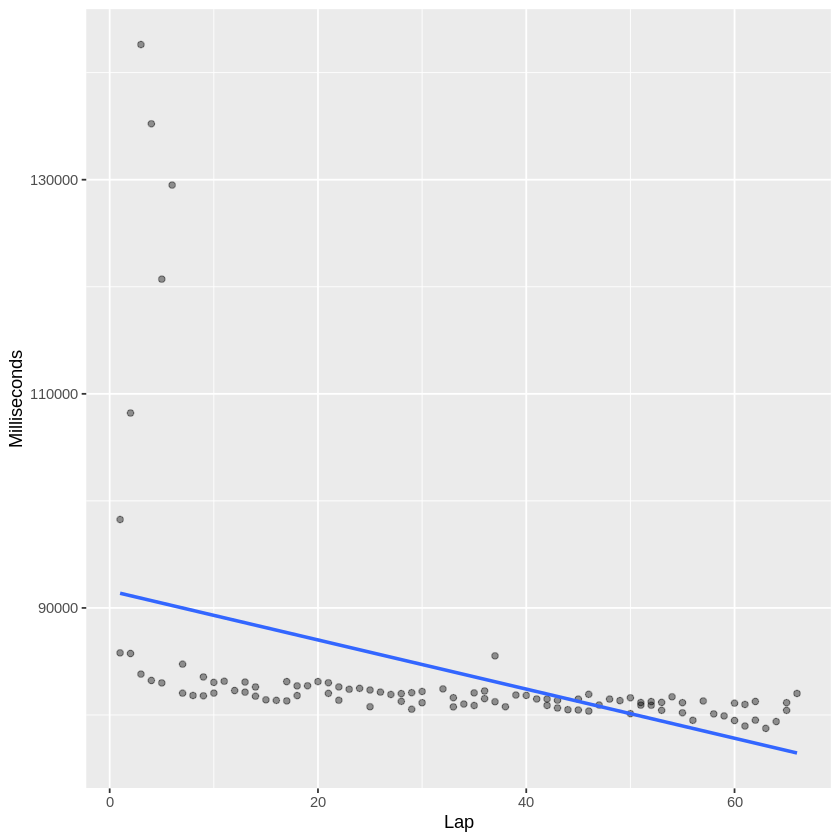

In [5]:
#2. Portimão

lh_Portimão <- ham_laps %>%
                filter(raceId %in% Portimão_race_ID) 

lh_Portimão_clean <- lh_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_Portimão_clean
lh_Portimão_clean_ID <- lh_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_Portimão_races <- ham_laps %>%
                    filter(raceId %in% lh_Portimão_clean_ID) 

formulaone_split <- initial_split(lh_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1,58
18,58
36,58
338,58
841,58
860,58
880,58
926,58
989,58


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5446173,90.76956,1.512826


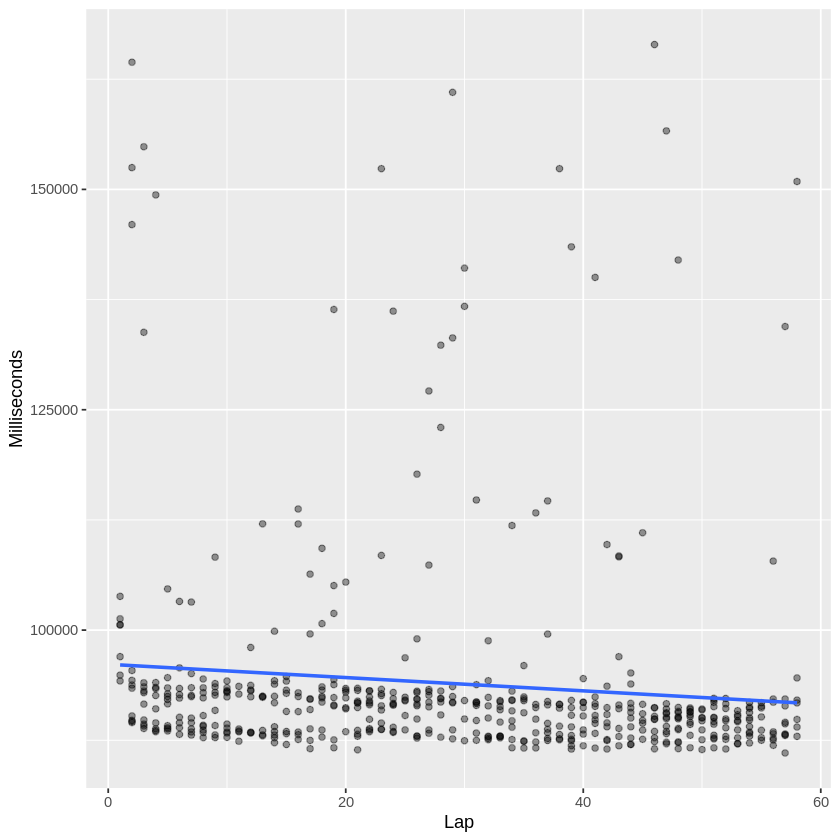

In [6]:
#3.  Australia

lh_aus <- ham_laps %>%
                filter(raceId %in% aus_race_ID) 

lh_aus_clean <- lh_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 2)
lh_aus_clean
lh_aus_clean_ID <- lh_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_aus_races <- ham_laps %>%
                    filter(raceId %in% lh_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5497336,91.62226,1.527038


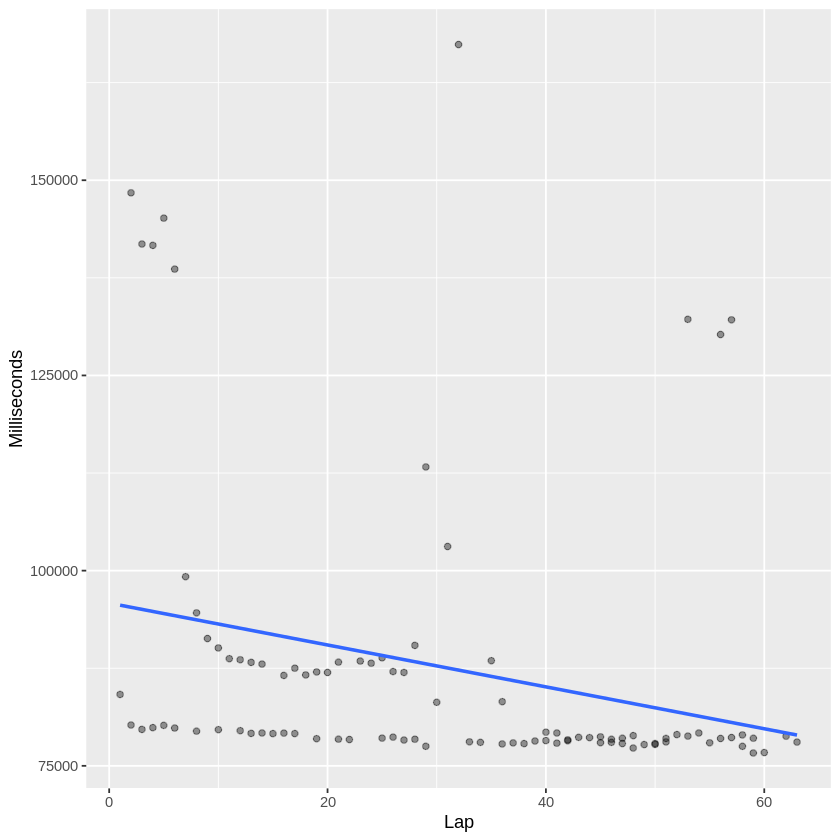

In [7]:
#4.  Italy, Imola

lh_imola <- ham_laps %>%
                filter(raceId %in% imola_race_ID) 

lh_imola_clean <- lh_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_imola_clean
lh_imola_clean_ID <- lh_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_imola_races <- ham_laps %>%
                    filter(raceId %in% lh_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
7,58
22,58
47,58
343,58
844,58
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5359770,89.3295,1.488825


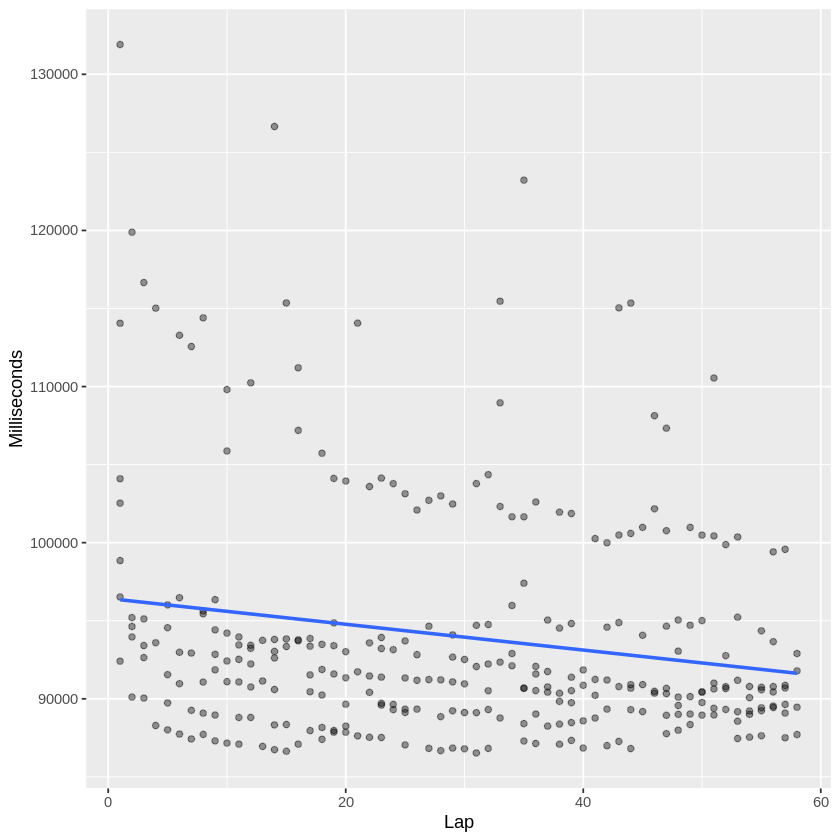

In [8]:
#5. Turkey (Replacing Miami)

lh_turkey <- ham_laps %>%
                filter(raceId %in% turkey_race_ID) 

lh_turkey_clean <- lh_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_turkey_clean
lh_turkey_clean_ID <- lh_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_turkey_races <- ham_laps %>%
                    filter(raceId %in% lh_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
21,66
845,66
864,66
904,66
930,66
973,66
993,66
1014,66
1036,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5832656,97.21093,1.620182


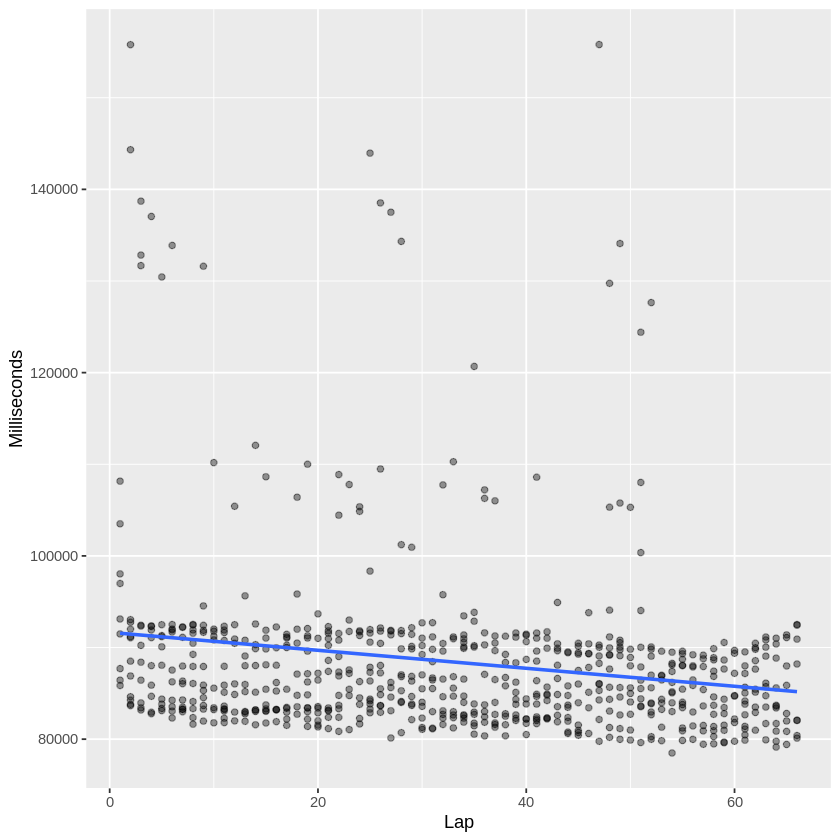

In [9]:
#6.  Spain

lh_spain <- ham_laps %>%
                filter(raceId %in% spain_race_ID) 

lh_spain_clean <- lh_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_spain_clean
lh_spain_clean_ID <- lh_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_spain_races <- ham_laps %>%
                    filter(raceId %in% lh_spain_clean_ID)

formulaone_split <- initial_split(lh_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
40,78
342,78
846,78
865,78
885,78
905,78
931,78
953,78
974,78


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6542111,109.0352,1.817253


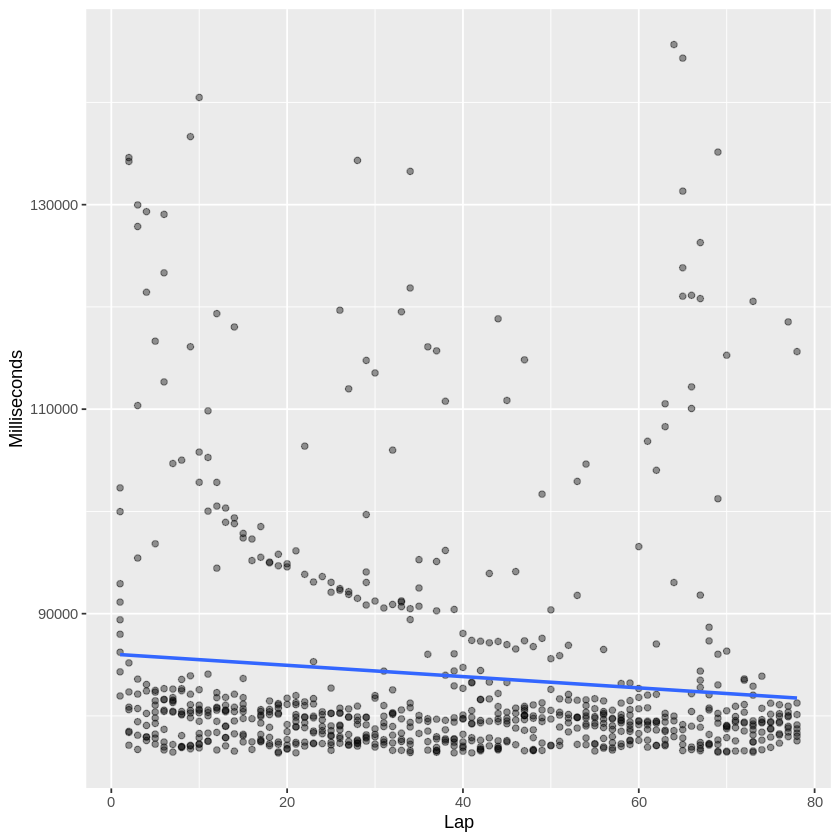

In [10]:
#7.   Monaco

lh_monaco <- ham_laps %>%
                filter(raceId %in% monaco_race_ID) 

lh_monaco_clean <- lh_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_monaco_clean
lh_monaco_clean_ID <- lh_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monaco_races <- ham_laps %>%
                    filter(raceId %in% lh_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
976,51
992,51
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5869243,97.82071,1.630345


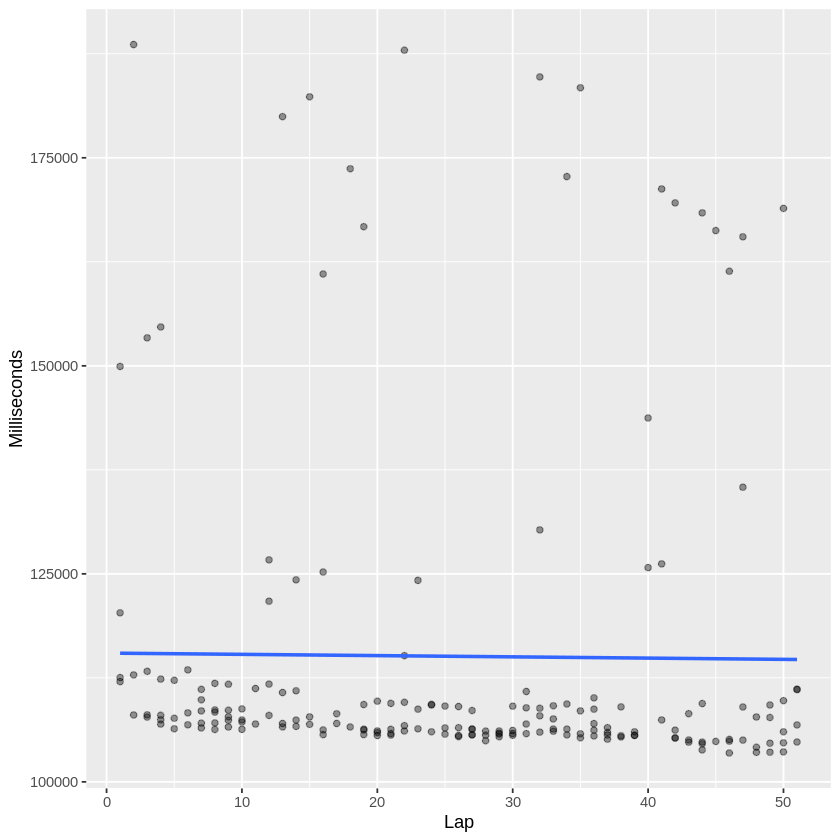

In [11]:
#8.  Azerbaijan

lh_azerbaijan <- ham_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

lh_azerbaijan_clean <- lh_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_azerbaijan_clean
lh_azerbaijan_clean_ID <- lh_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_azerbaijan_races <- ham_laps %>% 
                    filter(raceId %in% lh_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
41,70
344,70
866,70
886,70
932,70
954,70
975,70
1016,70
995,68


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5594631,93.24386,1.554064


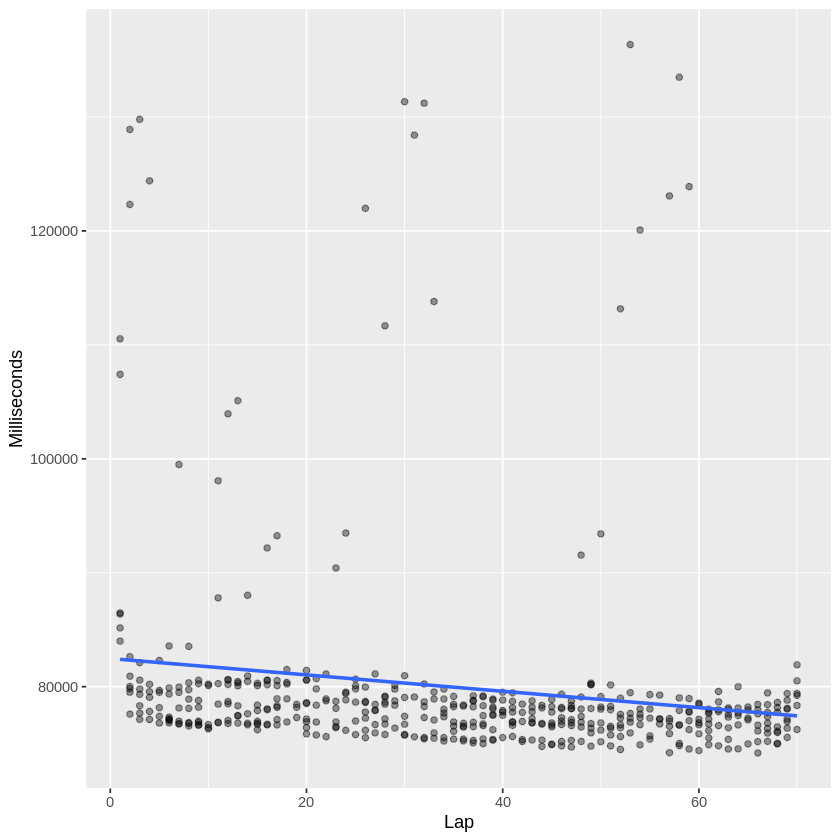

In [12]:
#9.  Canada

lh_canada <- ham_laps %>%
                filter(raceId %in% canada_race_ID) 

lh_canada_clean <- lh_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 68 | n == 70)
lh_canada_clean
lh_canada_clean_ID <- lh_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_canada_races <- ham_laps %>%
                    filter(raceId %in% lh_canada_clean_ID)

formulaone_split <- initial_split(lh_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5193435,86.55726,1.442621


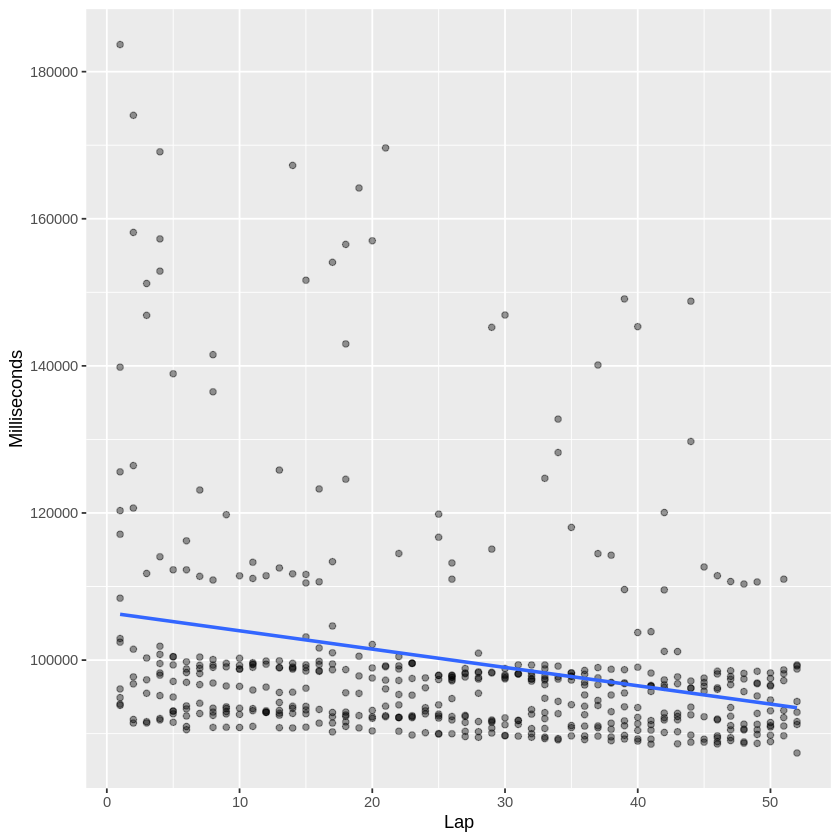

In [13]:
#10.  Great Britain

lh_uk <- ham_laps %>%
                filter(raceId %in% uk_race_ID) 

lh_uk_clean <- lh_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 52 | n == 51)

lh_uk_clean_ID <- lh_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uk_races <- ham_laps %>%
                    filter(raceId %in% lh_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5118126,85.30211,1.421702


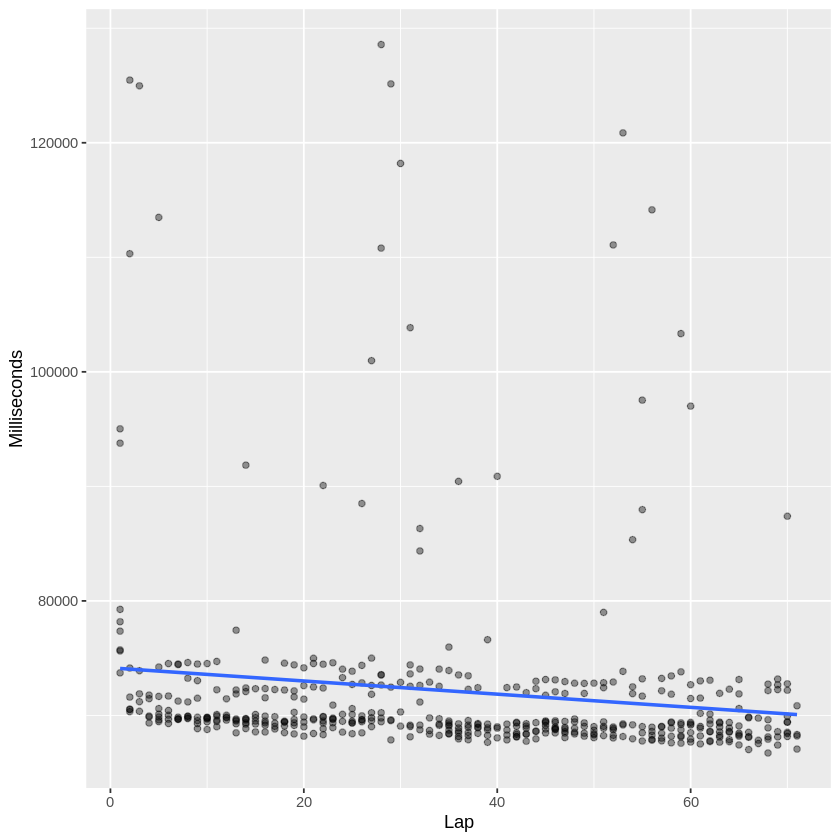

In [14]:
#11.  Austria

lh_austria <- ham_laps %>%
                filter(raceId %in% austria_race_ID) 

lh_austria_clean <- lh_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 62)

lh_austria_clean_ID <- lh_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austria_races <- ham_laps %>%
                    filter(raceId %in% lh_austria_clean_ID)

formulaone_split <- initial_split(lh_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5245688,87.42814,1.457136


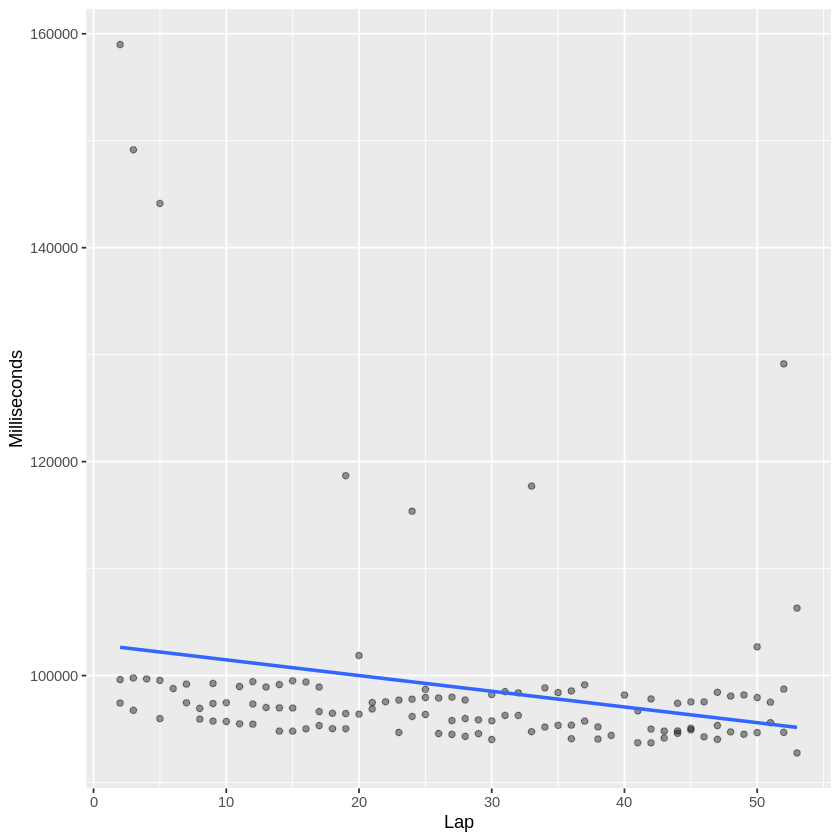

In [15]:
#12.  France

lh_france <- ham_laps %>%
                filter(raceId %in% france_race_ID) 

lh_france_clean <- lh_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_france_clean
lh_france_clean_ID <- lh_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_france_races <- ham_laps %>%
                    filter(raceId %in% lh_france_clean_ID)

formulaone_split <- initial_split(lh_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6076802,101.28,1.688001


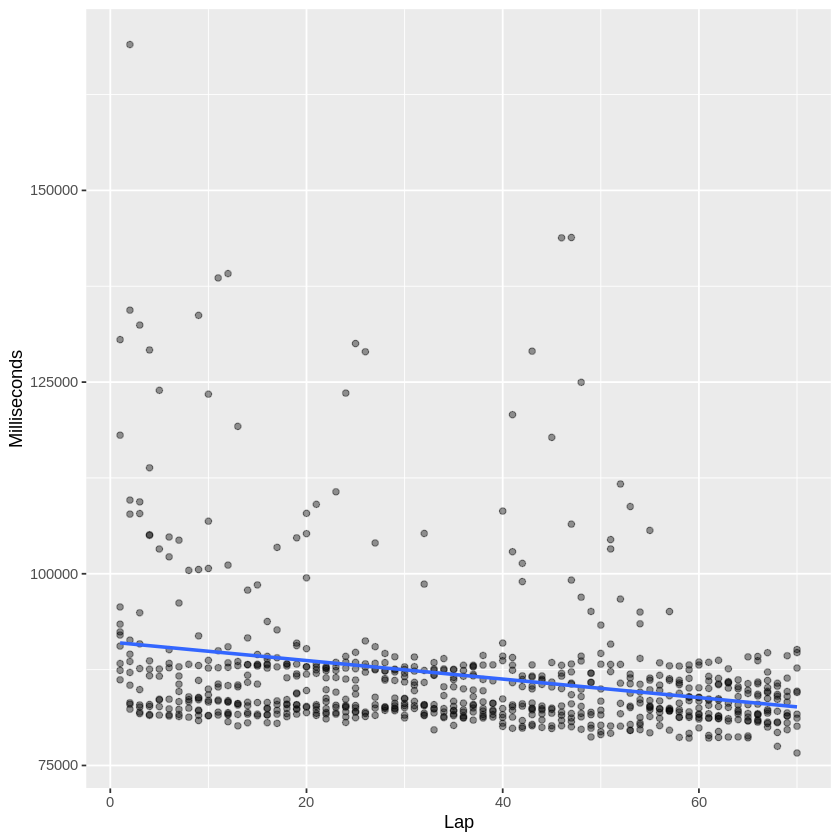

In [16]:
#13.  Hungary

lh_hungary <- ham_laps %>%
                filter(raceId %in% hungary_race_ID) 

lh_hungary_clean <- lh_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 23)

lh_hungary_clean_ID <- lh_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_hungary_races <- ham_laps %>%
                    filter(raceId %in% lh_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

## GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
30,44
49,44
349,44
891,44
960,44
980,44
1001,44
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5057021,84.28369,1.404728


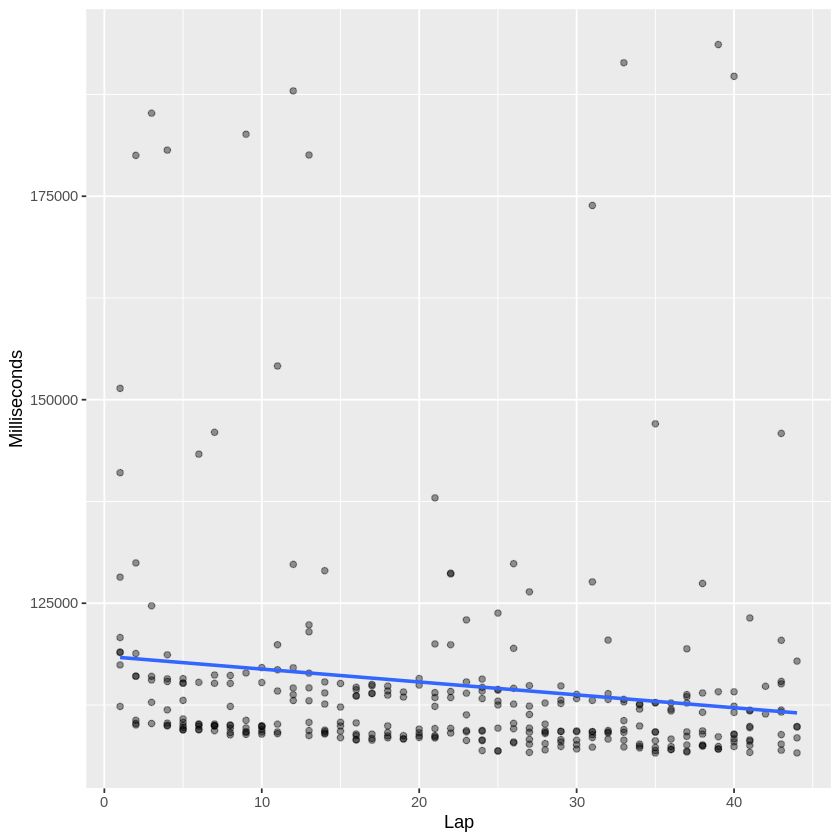

In [17]:
#14.  Belgium

lh_belgium <- ham_laps %>%
                filter(raceId %in% belgium_race_ID) 

lh_belgium_clean <- lh_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 44 | n== 43)
lh_belgium_clean
lh_belgium_clean_ID <- lh_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_belgium_races <- ham_laps %>%
                    filter(raceId %in% lh_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5419130,90.31883,1.505314


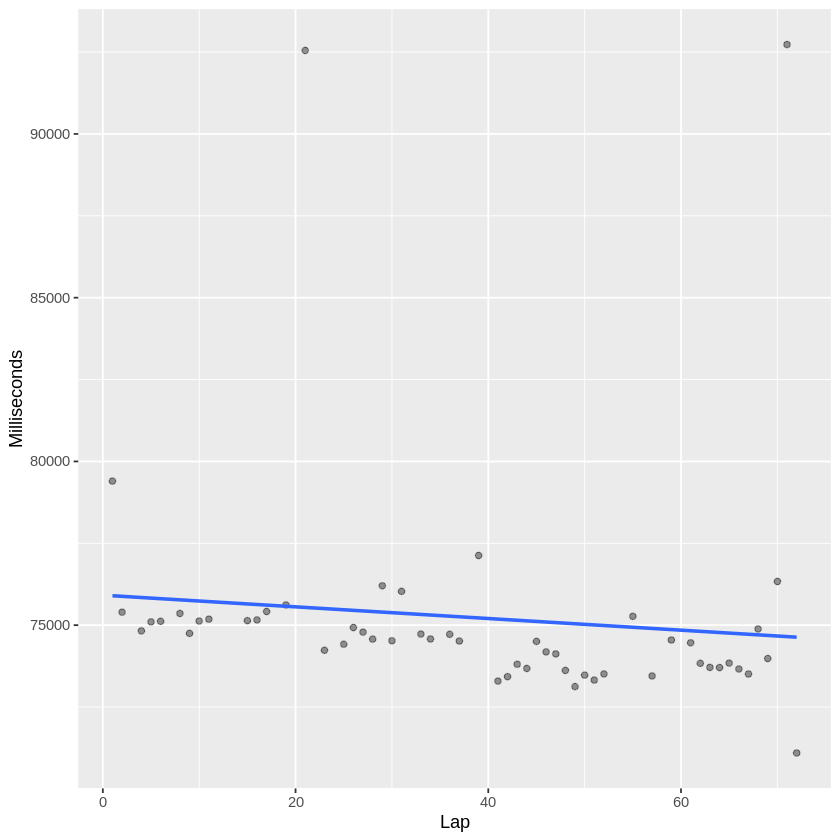

In [18]:
#15.  Netherlands

lh_netherlands <- ham_laps %>%
                filter(raceId %in% netherlands_race_ID) 

lh_netherlands_clean <- lh_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_netherlands_clean
lh_netherlands_clean_ID <- lh_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_netherlands_races <- ham_laps %>%
                    filter(raceId %in% lh_netherlands_clean_ID)

formulaone_split <- initial_split(lh_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
31,53
48,53
853,53
872,53
892,53
912,53
938,53
961,53
981,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4740063,79.00105,1.316684


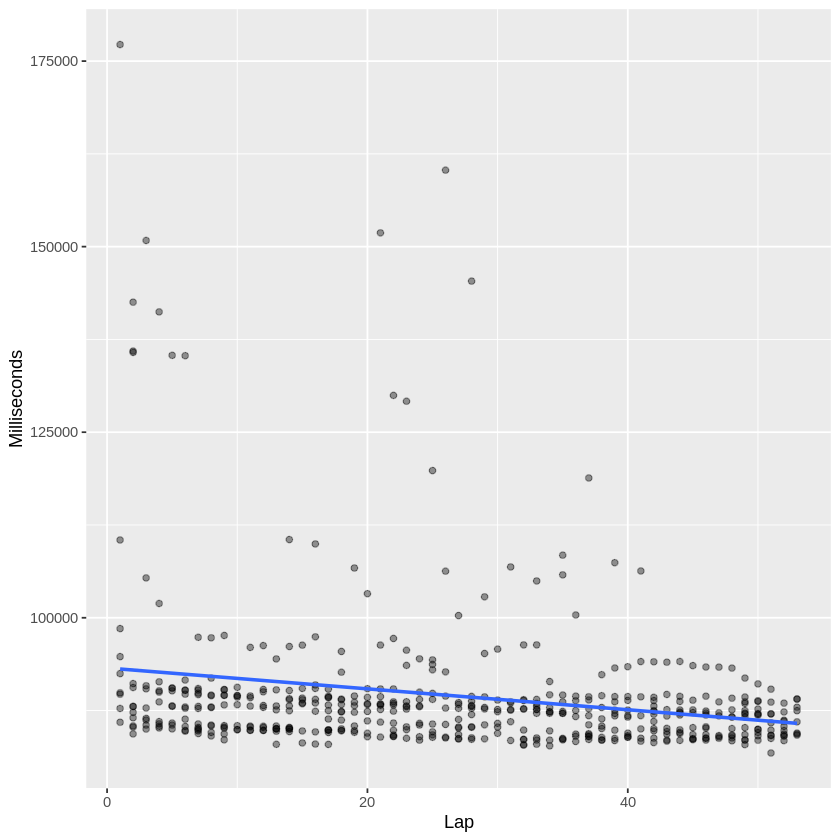

In [19]:
#16.  Italy, Monza

lh_monza <- ham_laps %>%
                filter(raceId %in% monza_race_ID) 

lh_monza_clean <- lh_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 25)
lh_monza_clean
lh_monza_clean_ID <- lh_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monza_races <- ham_laps %>%
                    filter(raceId %in% lh_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7135133,118.9189,1.981981


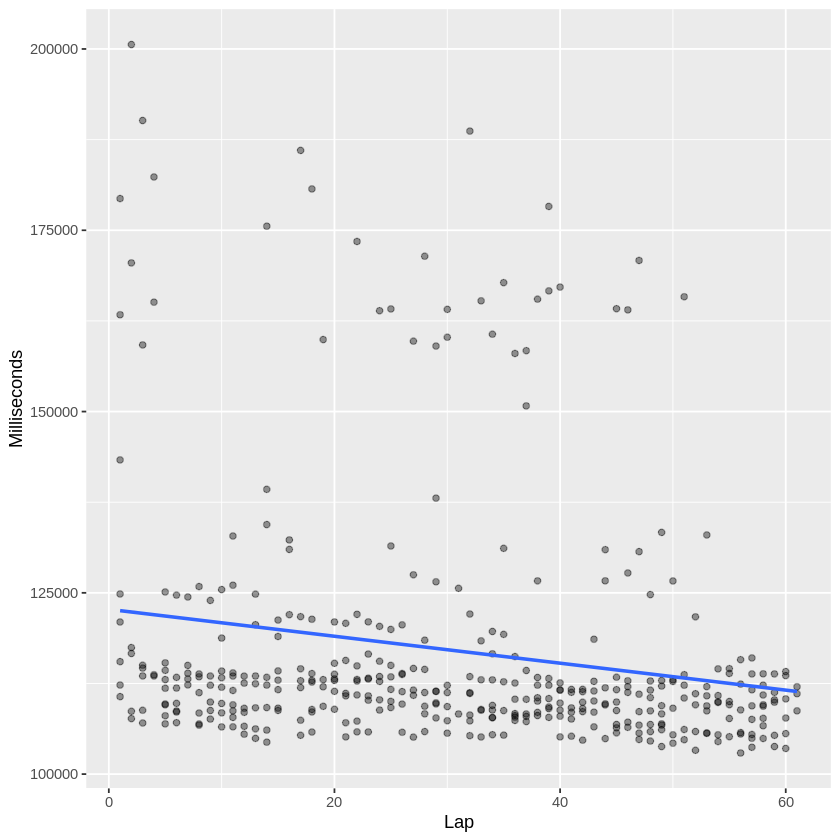

In [20]:
#17.  Singapore

lh_singapore <- ham_laps %>%
                filter(raceId %in% singapore_race_ID) 

lh_singapore_clean <- lh_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 61| n == 60| n == 58)

lh_singapore_clean_ID <- lh_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_singapore_races <- ham_laps %>%
                    filter(raceId %in% lh_singapore_clean_ID)

formulaone_split <- initial_split(lh_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5288392,88.13987,1.468998


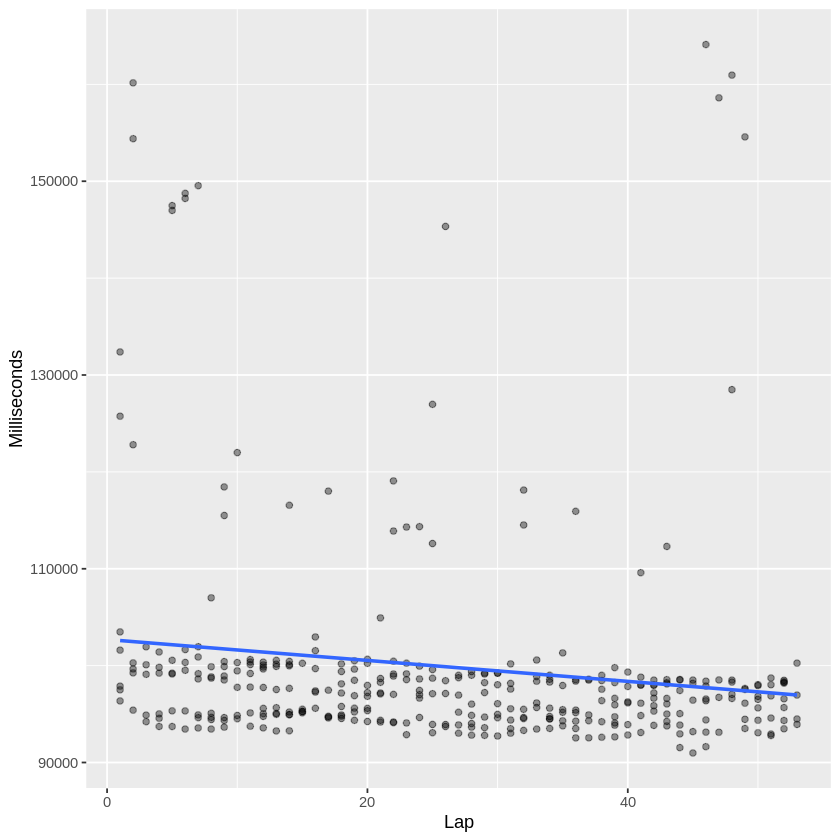

In [21]:
#18.  Japan

lh_japan <- ham_laps %>%
                filter(raceId %in% japan_race_ID) 

lh_japan_clean <- lh_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 53| n == 52)

lh_japan_clean_ID <- lh_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_japan_races <- ham_laps %>%
                    filter(raceId %in% lh_japan_clean_ID)

formulaone_split <- initial_split(lh_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5876680,97.94467,1.632411


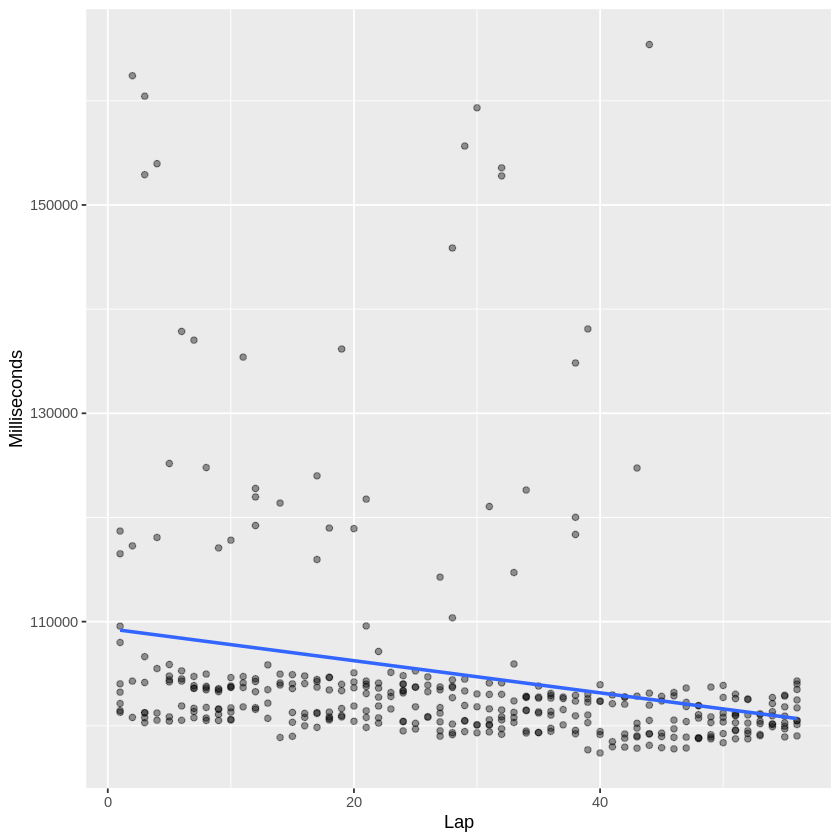

In [22]:
#19.  USA, Austin

lh_austin <- ham_laps %>%
                filter(raceId %in% austin_race_ID) 

lh_austin_clean <- lh_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_austin_clean_ID <- lh_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austin_races <- ham_laps %>%
                    filter(raceId %in% lh_austin_clean_ID)

formulaone_split <- initial_split(lh_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5962875,99.38125,1.656354


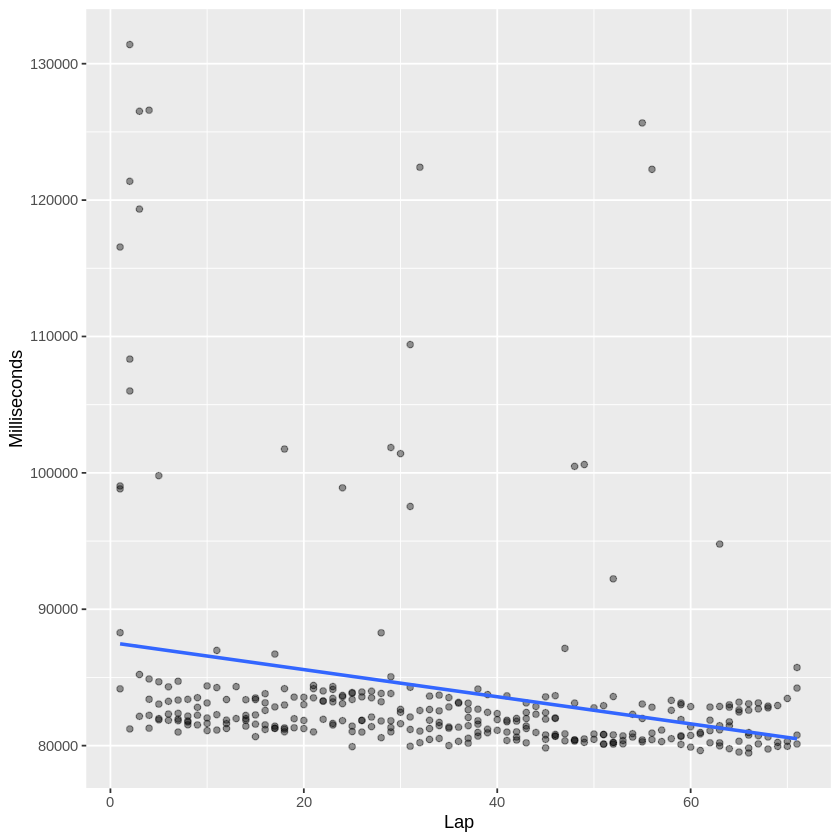

In [23]:
#20.  Mexico

lh_mexico <- ham_laps %>%
                filter(raceId %in% mexico_race_ID) 

lh_mexico_clean <- lh_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_mexico_clean_ID <- lh_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_mexico_races <- ham_laps %>%
                    filter(raceId %in% lh_mexico_clean_ID)

formulaone_split <- initial_split(lh_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5680308,94.67181,1.577863


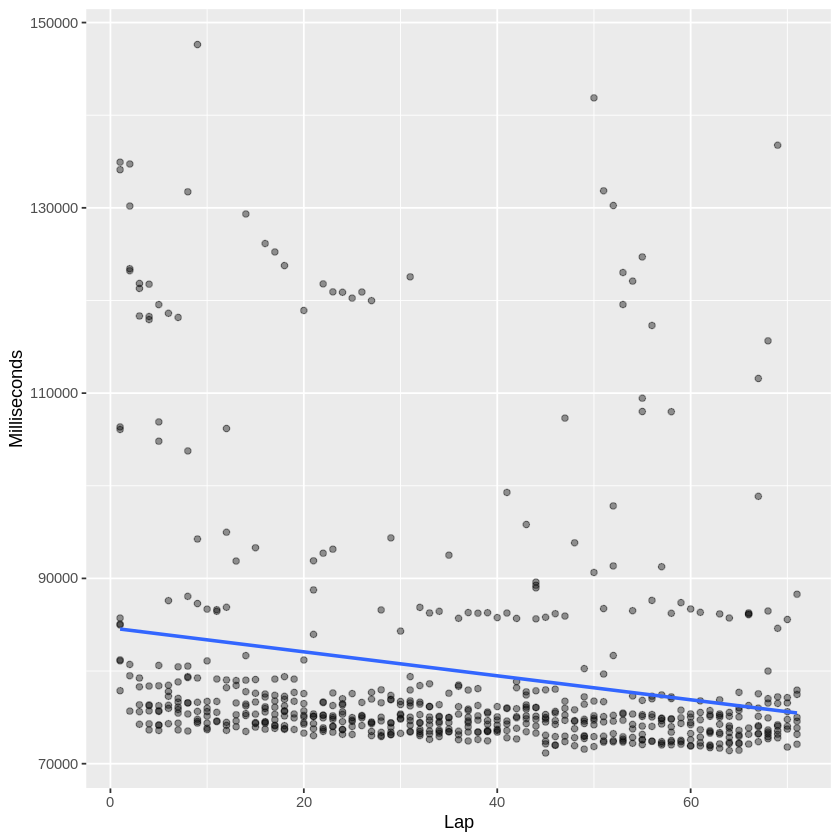

In [24]:
#21. Brazil

lh_brazil <- ham_laps %>%
                filter(raceId %in% brazil_race_ID) 

lh_brazil_clean <- lh_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 71| n == 70)

lh_brazil_clean_ID <- lh_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_brazil_races <- ham_laps %>%
                    filter(raceId %in% lh_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
355,55
858,55
897,55
918,55
945,55
968,55
988,55
1009,55
1030,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6172459,102.8743,1.714572


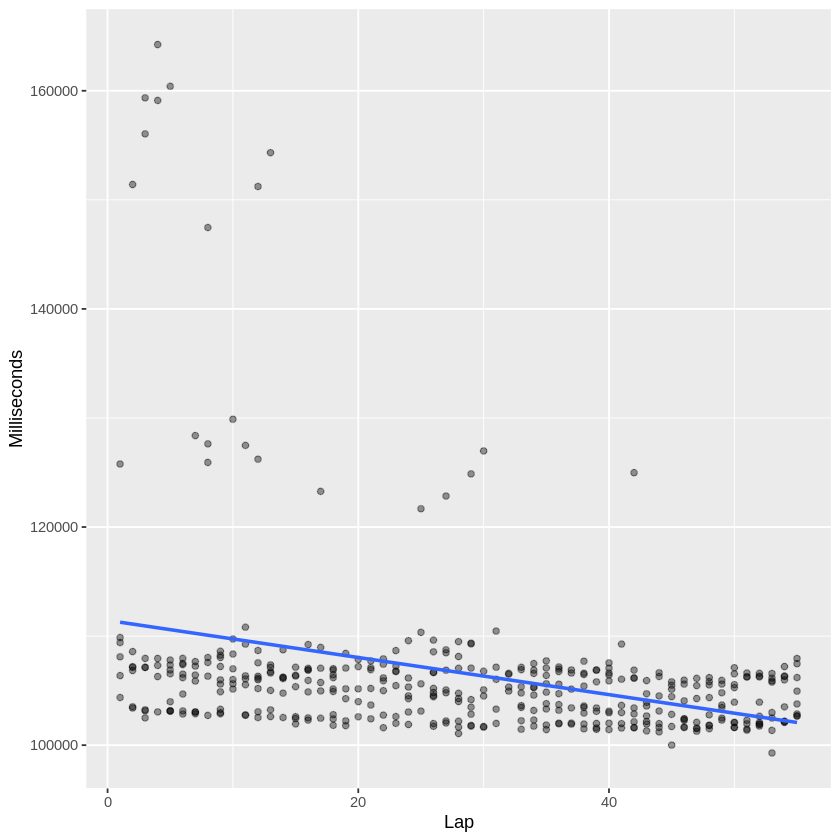

In [25]:
#22.  Abu Dhabi

lh_uae <- ham_laps %>%
                filter(raceId %in% uae_race_ID) 

lh_uae_clean <- lh_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 55)
lh_uae_clean
lh_uae_clean_ID <- lh_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uae_races <- ham_laps %>%
                    filter(raceId %in% lh_uae_clean_ID)

formulaone_split <- initial_split(lh_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()